In [2]:
# importing all necessary libs
import numpy as np
from numpy import linspace

import pandas as pd 
import seaborn as sns

get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import cm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KernelDensity
from scipy.stats.kde import gaussian_kde
from scipy.special import logsumexp

from scipy.interpolate import griddata
import scipy as sp
import scipy.ndimage

#pip install geojsoncontour
import geojsoncontour
import branca


import folium
from folium import plugins
from folium.plugins import HeatMap
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import MarkerCluster
MarkerCluster()

#Follow the steps in below link for geopandas
#https://geoffboeing.com/2014/09/using-geopandas-windows/
import geopandas as gpd
import json

#pip install geopy
from geopy.geocoders import Nominatim
from pandas import DataFrame

from sklearn.neighbors import BallTree 
from sklearn.neighbors import BallTree , KDTree

import datetime
import sys
import math
import random
from mpl_toolkits.mplot3d import axes3d

import pygeoj
import mapclassify.classifiers as classifiers

from shapely import wkt

import numpy as np
from shapely.geometry import Polygon, Point

ModuleNotFoundError: No module named 'plotly'

# DEPENDENCY 
conda install -c anaconda numpy

conda install -c anaconda pandas

conda install -c conda-forge matplotlib

conda install -c anaconda seaborn

conda install -c anaconda scipy

conda install -c anaconda scikit-learn

conda install -c conda-forge geopy

conda install -c plotly plotly

pip install geojsoncontour

conda install -c conda-forge branca

conda install -c conda-forge folium

conda install geopandas

conda install -c jmcmurray json

pip install PyGeoj

conda install -c conda-forge mapclassify

In [2]:
#function to remove nan values 
def Remove_NaN_InData(data,col_name):
    data[col_name].replace('', np.nan, inplace=True)
    data.dropna(subset=[col_name], inplace=True)
    data=data.reset_index(drop=True)

In [3]:
#Importing The Baltimore Crime Data
df_Crime = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv',low_memory=False)
df_Crime.head(5)

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,02/08/2020,2:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312,EASTERN,DARLEY PARK,-76.593870,39.315341,NaN,GROCERY/CONFECTION,Eastern 1,1
1,02/08/2020,6:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333,EASTERN,MADISON EASTEND,-76.577425,39.299094,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
4,02/08/2020,17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314,EASTERN,OLIVER,-76.595946,39.307350,NaN,ROW/TOWNHOUSE-OCC,Eastern 1,1


In [4]:
df_neighood = pd.read_csv('2010_Census_Profile_by_Neighborhood_Statistical_Areas.csv',low_memory=False)
df_neighood=df_neighood[['the_geom', 'Name', 'Population', 'White', 'Blk_AfAm', 'AmInd_AkNa',
       'Asian', 'NatHaw_Pac', 'Other_Race', 'TwoOrMore', 'Hisp_Lat', 'Male',
       'Female']]
#Checking for empty rows and removing them
Remove_NaN_InData(df_neighood,'the_geom')
Remove_NaN_InData(df_neighood,'Name')
df_neighood.rename(columns={'the_geom': 'geometry'}, inplace=True)
df_neighood = df_neighood.sort_values(by = ['Name'])
df_neighood.head(10)

,geometry,Name,Population,White,Blk_AfAm,AmInd_AkNa,Asian,NatHaw_Pac,Other_Race,TwoOrMore,Hisp_Lat,Male,Female
0,MULTIPOLYGON (((-76.61113021264933 39.32343829...,Abell,889.0,606.0,213.0,3.0,33.0,1,4.0,29.0,30.0,424.0,465.0
1,MULTIPOLYGON (((-76.67262514014695 39.29183630...,Allendale,3554.0,18.0,3497.0,8.0,6.0,0,5.0,20.0,21.0,1536.0,2018.0
2,MULTIPOLYGON (((-76.56852496130239 39.33594331...,Arcadia,1235.0,623.0,537.0,4.0,12.0,0,10.0,49.0,31.0,592.0,643.0
4,MULTIPOLYGON (((-76.68626338505344 39.34790493...,Arlington,2598.0,33.0,2496.0,3.0,9.0,0,10.0,47.0,17.0,1219.0,1379.0
5,MULTIPOLYGON (((-76.55879992777896 39.30645665...,Armistead Gardens,3458.0,2698.0,108.0,51.0,14.0,8,413.0,166.0,841.0,1621.0,1837.0
6,MULTIPOLYGON (((-76.67464511466756 39.32512610...,Ashburton,2520.0,33.0,2431.0,6.0,4.0,0,15.0,31.0,39.0,1082.0,1438.0
7,MULTIPOLYGON (((-76.56953542603715 39.29424244...,Baltimore Highlands,2703.0,1023.0,700.0,63.0,75.0,11,693.0,138.0,1117.0,1485.0,1218.0
9,MULTIPOLYGON (((-76.60947756699595 39.31214809...,Barclay,2181.0,302.0,1764.0,10.0,23.0,0,35.0,47.0,78.0,1149.0,1032.0
10,MULTIPOLYGON (((-76.62755904654757 39.28383331...,Barre Circle,450.0,228.0,154.0,6.0,34.0,0,12.0,16.0,14.0,224.0,226.0
125,MULTIPOLYGON (((-76.54182274202012 39.28756107...,Bayview,2263.0,1481.0,234.0,7.0,123.0,0,342.0,76.0,519.0,1151.0,1112.0


In [5]:
df_geojson = gpd.read_file('baltimore.json', driver='GeoJSON')
df_geojson=df_geojson[['name','geometry']]
df_geojson = df_geojson.sort_values(by = ['name'])
df_geojson = df_geojson.reset_index(drop=True)
df_geojson.head(10)

,name,geometry
0,Abell,"MULTIPOLYGON (((-76.61113 39.32344, -76.61167 ..."
1,Allendale,"MULTIPOLYGON (((-76.67262 39.29184, -76.67262 ..."
2,Arcadia,"MULTIPOLYGON (((-76.56852 39.33594, -76.56814 ..."
3,Arlington,"MULTIPOLYGON (((-76.68626 39.34790, -76.68646 ..."
4,Armistead Gardens,"MULTIPOLYGON (((-76.55880 39.30646, -76.55892 ..."
5,Ashburton,"MULTIPOLYGON (((-76.67464 39.32513, -76.67556 ..."
6,Baltimore Highlands,"MULTIPOLYGON (((-76.56954 39.29424, -76.56954 ..."
7,Barclay,"MULTIPOLYGON (((-76.60948 39.31215, -76.60948 ..."
8,Barre Circle,"MULTIPOLYGON (((-76.62756 39.28383, -76.62783 ..."
9,Bayview,"MULTIPOLYGON (((-76.54182 39.28756, -76.54229 ..."


In [6]:
# creating a dataset with all the 

df_geojson['Male']=df_neighood[['Male']]
df_geojson['Female']=df_neighood[['Female']]
df_geojson['White']=df_neighood[['White']]
df_geojson['Blk_AfAm']=df_neighood[['Blk_AfAm']]
df_geojson['AmInd_AkNa']=df_neighood[['AmInd_AkNa']]
df_geojson['Asian']=df_neighood[['Asian']]
df_geojson['NatHaw_Pac']=df_neighood[['NatHaw_Pac']]
df_geojson['Other_Race']=df_neighood[['Other_Race']]
df_geojson['TwoOrMore']=df_neighood[['TwoOrMore']]
df_geojson['Hisp_Lat']=df_neighood[['Hisp_Lat']]
df_geojson['Crime_Count']=""
df_geojson['Police_Count']=""
df_geojson['Detected_Crime_Count']=""

In [7]:
df_geojson.name.unique()

array(['Abell', 'Allendale', 'Arcadia', 'Arlington', 'Armistead Gardens',
       'Ashburton', 'Baltimore Highlands', 'Barclay', 'Barre Circle',
       'Bayview', 'Beechfield', 'Belair-Edison', 'Belair-Parkside',
       'Bellona-Gittings', 'Belvedere', 'Berea', 'Better Waverly',
       'Beverly Hills', 'Biddle Street', 'Blythewood', 'Bolton Hill',
       'Boyd-Booth', 'Brewers Hill', 'Bridgeview/Greenlawn',
       'Broadway East', 'Broening Manor', 'Brooklyn', 'Burleith-Leighton',
       "Butcher's Hill", 'CARE', 'Callaway-Garrison', 'Cameron Village',
       'Canton', 'Canton Industrial Area',
       'Carroll - Camden Industrial Area', 'Carroll Park',
       'Carroll-South Hilton', 'Carrollton Ridge', 'Cedarcroft',
       'Cedmont', 'Cedonia', 'Central Forest Park',
       'Central Park Heights', 'Charles North', 'Charles Village',
       'Cherry Hill', 'Cheswolde', 'Chinquapin Park', 'Clifton Park',
       'Coldspring', 'Coldstream Homestead Montebello',
       'Concerned Citizens Of 

In [8]:
# to genrate random police equally distibuted in each nighbourhood

def random_points_within(num_points, file_name):
    """
    to genrate random police equally distibuted in each nighbourhood
    takes 2 argument number of points to genrate in each naighbourhood
    and output file name
    
    """
    poly = Polygon([(39.37,-76.71), (39.278,-76.71), (39.235,-76.6122), (39.21,-76.53), (39.37,-76.53)])
    min_x, min_y, max_x, max_y = poly.bounds
    
    with open(file_name, 'w') as output:
        output.write('Latitude,Longitude\n')
        points = []
        while len(points) < num_points:
            point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
            if (point.within(poly)):
                points.append(point)
                output.write(f'{point.x},{point.y}\n')

In [9]:
def Filter_Crime_On_Month(df_Crime,sample_month, year):
    #Formating CrimeDate to specific format
    df_Crime['CrimeDate'] =  pd.to_datetime(df_Crime['CrimeDate'], format='%m/%d/%Y')
    
    #Adding Year and month columns to filter for easy stimulation
    df_Crime['year'] = pd.DatetimeIndex(df_Crime['CrimeDate']).year
    df_Crime['month'] = pd.DatetimeIndex(df_Crime['CrimeDate']).month
    
    #Filtering only data for 2019
    df_Crime=df_Crime.loc[df_Crime['year']== year]
    df_Crime=df_Crime.loc[df_Crime['month']== sample_month]
    
    #Remove NaN in Data
    print("Length of file before Removing Empty Rows: ",len(df_Crime))
    Remove_NaN_InData(df_Crime,'Latitude')
    Remove_NaN_InData(df_Crime,'Longitude')
    Remove_NaN_InData(df_Crime,'Neighborhood')
    print("Length of file After Removing Empty Rows: ",len(df_Crime))
    
    #Checking for Outliers and removing them
    print("Checking for Outliers and removing them")
    #plt.figure()
    #plt.boxplot(df_Crime['Longitude'], 0, 'gD')
    #plt.show()

    #plt.figure()
    #plt.boxplot(df_Crime['Latitude'], 0, 'gD')
    #plt.show()

    Q1 = df_Crime['Longitude'].quantile(0.25)
    Q3 = df_Crime['Longitude'].quantile(0.75)
    IQR = Q3 - Q1

    df_Crime = df_Crime [(df_Crime['Longitude'] >= Q1 - 1.5 * IQR) & (df_Crime['Longitude'] <= Q3 + 1.5 *IQR)]

    Q1 = df_Crime['Latitude'].quantile(0.25)
    Q3 = df_Crime['Latitude'].quantile(0.75)
    IQR = Q3 - Q1

    df_Crime = df_Crime [(df_Crime['Latitude'] >= Q1 - 1.5 * IQR) & (df_Crime['Latitude'] <= Q3 + 1.5 *IQR)]

    print("Length of file After Removing Outliers: ",len(df_Crime),'\n')
    #print("Displaying the data after preprocessing")
    #print(df_Crime)
    df_Crime = df_Crime.reset_index(drop=True
                                   )
    
    return df_Crime

In [10]:
def Genrating_Rpolice(df_crime, num_police = 1400):
    """
    genrates Random police location based on KDE takes 2 argument
    df_crime = dataset to genrate KDE 
    num_police = number of police to genrate 
    returns a dataset with  'Latitude' ,'Longitude' columns of police location
    
    """
    lis = df_crime[[ 'Latitude' ,'Longitude']].values
    kde = KernelDensity(kernel='gaussian', bandwidth=0.01)
    kde.fit(lis)
    log_dens = kde.score_samples(lis)
    ran = kde.sample([num_police])
    police_df = pd.DataFrame(ran, columns = ['Latitude','Longitude'])
    return police_df

In [11]:
def find_nighbours(jan_crime , exp, radius = 0.005 ):
    """
    this function takes 3 parameters 1- crime data , 2 police location data and radius to see if police is able to reach it 
    0.001 = 100 meters  
    returns crime data with new field that is detected crimes
    """
    x  = list(zip(jan_crime.Latitude , jan_crime.Longitude))
    y = list(zip(exp.Latitude , exp.Longitude))
    tree = KDTree(x, leaf_size=2 )
    index = []
    for i in y:
        indices = tree.query_radius([i], r=radius)
        index = index + list(indices[0])
    
    jan_crime['detected'] = ''
    jan_crime.iloc[list(set(index)),[-1]] = 1
    return jan_crime.iloc[list(set(index))]

In [17]:
def get_nearest_nhood(src_points, candidates, k_neighbors= 1):
    
    
    new_ponits = list(zip(src_points.Latitude , src_points.Longitude))
    crime_points = list(zip(candidates.Latitude , candidates.Longitude))

    # Create tree from the candidate points
    tree = BallTree(crime_points, leaf_size=15, metric='haversine')

    # Find closest points and distances
    distances, indices = tree.query(new_ponits, k = k_neighbors)

    # Transpose to get distances and indices into arrays
    distances = distances.transpose()
    indices = indices.transpose()

    # Get closest indices and distances (i.e. array at index 0)
    # note: for the second closest points, you would take index 1, etc.
    closest = indices[0]
    x = candidates.iloc[closest]['Neighborhood'].reset_index()
    src_points['Neighborhood'] = x['Neighborhood']

    # Return indices and distances
    return src_points

In [12]:
def draw_KDE_Map(i_data,i_geo_map,g1,cl):
    
    """
    creates kde map based on location 
    takes 4 argument 
    1 i_data = Data to plot
    2 i_geo_map = where to plot example 'baltimore'
    3 feture group
    4 colors

    """
    geomap=i_geo_map
    #Using Kernel Density Estimation
    X = i_data[['Longitude', 'Latitude']].values
    kde = KernelDensity(kernel='gaussian', bandwidth=0.01)
    kde.fit(X)

    log_dens = kde.score_samples(X)
    log_dens1 = np.exp(log_dens)
    #Genrating KDE Contours
    # Setup
    
    debug     = False
    # Setup colormap
    colors = cl
    vmin   = log_dens.min()
    vmax   =log_dens.max()
    levels = len(colors)
    cm     = branca.colormap.LinearColormap(colors, vmin=vmin, vmax=vmax).to_step(levels)
    #The original data
    x_orig = np.asarray(i_data['Longitude'].values.tolist())
    y_orig = np.asarray(i_data['Latitude'].values.tolist())
    z_orig = np.asarray(log_dens.tolist())
    z1_orig= np.asarray(log_dens1.tolist())
    
  
    data = {'x': [x_orig ],
        'y': [y_orig],
        'z': [z1_orig]
        }

    df_threed = pd.DataFrame (data, columns = ['x','y','z'])    
    # Plot X,Y,Z
    plt.figure(figsize=(20,10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(x_orig, y_orig, z1_orig, c=z1_orig, cmap='viridis', linewidth=0.5);
    plt.show()
    
    # Plot X,Y,Z using plotly
    #plt.figure(figsize=(20,10))
    #fig = px.scatter_3d(df_threed, x='x', y='y', z='z',
    #          color='z')
    #fig.show()
    
    # Make a grid
    x_arr          = np.linspace(np.min(x_orig), np.max(x_orig), 500)
    y_arr          = np.linspace(np.min(y_orig), np.max(y_orig), 500)
    x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)
    # Grid the values
    z_mesh = griddata((x_orig, y_orig), z_orig, (x_mesh, y_mesh), method='linear')
    # Gaussian filter the grid to make it smoother
    sigma = [7,7]
    z_mesh = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')
    # Create the contour
    contourf = plt.contourf(x_mesh, y_mesh, z_mesh, levels, alpha=0.5, colors=colors, linestyles='None', vmin=vmin, vmax=vmax)
 
    # Convert matplotlib contourf to geojson
    geojson = geojsoncontour.contourf_to_geojson(
        contourf=contourf,
        min_angle_deg=3.0,
        ndigits=5,
        stroke_width=1,
        fill_opacity=1)

    # Plot the contour plot on folium
    g1.add_child(folium.GeoJson(
        geojson,
        style_function=lambda x: {
            'color':     x['properties']['stroke'],
            'weight':    x['properties']['stroke-width'],
            'fillColor': x['properties']['fill'],
            'opacity':   0.5,
        }))
    
    geomap.add_child(feature_group)
    geomap.add_child(g1)
    #folium.LayerControl().add_to(geomap)
    
    # Add the colormap to the folium map
    cm.caption = 'Kernel Density'
    geomap.add_child(cm)
    
    # Fullscreen mode
    plugins.Fullscreen(position='topright', force_separate_button=True).add_to(geomap)
    display(geomap)
    #geomap.save(f'folium_contour_temperature_map.html')
    
    return(geomap)

In [13]:
def plot_Geom_Map(data,i_map,g1):
    
    """
    adding location data into kde maps
    
    """
    
    data = data.loc[:, ['Longitude', 'Latitude']]
   
    for i in range(len(data)):
        Longitude = data.iloc[i][0]
        Latitude = data.iloc[i][1]
        g1.add_child(folium.CircleMarker(location = [Latitude, Longitude],radius=7,color='blue',
        fill=True,
        fill_color='#00000000'))
        
        
    i_map.add_child(feature_group)
    i_map.add_child(g1)
    display(i_map)
    return i_map

In [14]:
def draw_balti_border(i_final_map,g1,i_type):
    
    """
    drwaing borders  of the baltimore 
    
    """

    #Add chloropleth layer: optional
    folium.Choropleth(
        geo_data='baltimore.json',
        name='choropleth',
        data=df_neighood,
        columns=['Name', 'Population'],
        key_on='feature.properties.name',
        fill_color='YlGn',
        fill_opacity=0.4,
        line_opacity=0.1,
        legend_name='Population').add_to(i_final_map)

    #Create Style function for GeoJson method
    style_function = lambda x: {
        'fill_color':'YlGn',
        'color':'black',
        'weight':0.8,
        'line_opacity':0.0,
        'fillOpacity': 0.0
    }
    
    if(i_type=='analysis'):
        print(i_type)
        #Create Style function for GeoJson method
        g1.add_child(folium.GeoJson(
            df_geojson,
            style_function=style_function,
            tooltip=folium.GeoJsonTooltip(
                fields=['name', 'White','Blk_AfAm','Crime_Count','Police_Count','Detected_Crime_Count'],
                aliases=['Neighbourhood','White','Blk_AfAm','Crime_Count','Police_Count','Detected_Crime_Count'],
                localize=True
            )
        ))
    else:
         g1.add_child(folium.GeoJson(
            df_geojson,
            style_function=style_function,
            tooltip=folium.GeoJsonTooltip(
                fields=['name','Male','Female', 'White','Blk_AfAm','AmInd_AkNa','Asian','NatHaw_Pac','Other_Race','TwoOrMore','Hisp_Lat'],
                aliases=['Neighbourhood','Male Population','Female Population','White','Blk_AfAm','AmInd_AkNa','Asian','NatHaw_Pac','Other_Race','TwoOrMore','Hisp_Lat'],
                localize=True
            )
        ))
    
    
    i_final_map.add_child(feature_group)
    i_final_map.add_child(g1)
    
    #Inorder to know labels in map while zooming we can use the followig: optional
    folium.map.CustomPane('labels').add_to(i_final_map)
    folium.TileLayer('CartoDBPositronOnlyLabels',
                     pane='labels').add_to(i_final_map)
    
    return (i_final_map)

In [15]:
def plot_Geom_Map_ForKDESamples(i_data,i_geomap,i_color,g2):
    
    #Heat map using folium
    Sample_Location = i_data.loc[:, ['Longitude', 'Latitude']]
    for i in range(len(Sample_Location)):
        Longitude = Sample_Location.iloc[i][0]
        Latitude = Sample_Location.iloc[i][1]
        g2.add_child(
            folium.CircleMarker(
                location = [Latitude, Longitude],radius=1,color=i_color,
                fill=True,
                fill_color=i_color
            )
        )
        
    i_geomap.add_child(g2)  
    print("Map showing KDE with sample plots")
    display(i_geomap)
    
    return i_geomap

In [1]:



for monthint in range(1,13):
    balti_location=[39.2904,-76.6122]
    feature_group = FeatureGroup(name='Do_Not_Untick')
    balti_map = folium.Map(location=balti_location, tiles="cartodbpositron", zoom_start=12)
    data_police_COS=None
    map_for_KDE_crime=None
    map_for_Samples_crime=None
    map_for_KDE_police=None
    map_for_Samples_police=None
    final_map=None
    month = datetime.date(1900, monthint, 1).strftime('%B')
    balti_location=[39.2904,-76.6122]
    feature_group = FeatureGroup(name='Do_Not_Untick')
    
    color_crime=['#FFFFB2', '#FED976', '#FEB24C', '#FD8D3C', '#FC4E2A', '#E31A1C', '#B10026']
    color_police=['#b2b2ff','#9999ff','#7f7fff','#6666ff','#4c4cff','#3232ff', '#0000ff']
    
    #plotting crimes
    dc_g = folium.plugins.FeatureGroupSubGroup(feature_group, 'KDE_MAP_ForCrime')


    
    if monthint == 1:
        month_crime = Filter_Crime_On_Month(df_Crime, monthint , 2019)
        dc_g = folium.plugins.FeatureGroupSubGroup(feature_group, 'KDE_MAP_ForCrime')
        map_for_KDE_crime = draw_KDE_Map(month_crime,balti_map,dc_g,color_crime)
        map_for_Samples_crime = plot_Geom_Map_ForKDESamples(month_crime,map_for_KDE_crime,'#76B736',dc_g)
        
        #creating random police location based on first months crime KDE
        random_police = Genrating_Rpolice(month_crime, num_police = 1200)
        
        #plotting police data
        dc_g = folium.plugins.FeatureGroupSubGroup(feature_group, 'Plot_For_Police')
        map_for_Samples_police = plot_Geom_Map_ForKDESamples(random_police,map_for_Samples_crime,'#922B5E',dc_g)
        #detecting crimes in radius of 200m from the polic location and creating a new dataframe that
        #has all the detected crimes in it 
        month_crime_d = find_nighbours(month_crime , random_police, radius = 0.002 )
    
    else:
        #taking last months crime data to create kde
        premonth = month_crime
        
        #genrating random crime using previous months KDE
        new_crime = Genrating_Rpolice(premonth_crime, num_police = len(premonth_crime))
        new_crime = get_nearest_nhood(new_crime, premonth_crime) 
        
        #map for new genrated crimes 
        map_for_KDE_crime = draw_KDE_Map(new_crime,balti_map,dc_g,color_crime)
        map_for_Samples_crime = plot_Geom_Map_ForKDESamples(new_crime,map_for_KDE_crime,'#76B736',dc_g)                                   
        #creating KDE samples of police based on previous months detected crime 
        #random police is already genrated in last loop will be used again
        premonth_crime_detected = find_nighbours(premonth_crime , random_police, radius = 0.002 )
        random_police = Genrating_Rpolice(premonth_crime_detected, num_police = 1200)
        
        #plotting the police data
        dc_g = folium.plugins.FeatureGroupSubGroup(feature_group, 'KDE_MAP_ForPolice')
        map_for_KDE_police=draw_KDE_Map(premonth_crime_detected,balti_map,dc_g,color_police)
        dc_g = folium.plugins.FeatureGroupSubGroup(feature_group, 'Plot_ForPolice')
        map_for_Samples_police = plot_Geom_Map_ForKDESamples(random_police,map_for_Samples_crime,'#922B5E',dc_g)
        #detecting crimes
        month_crime_d = find_nighbours(new_crime , random_police, radius = 0.002 )
        month_crime = new_crime
        

    print("Map Showing Detected Crimes")
    dc_g = folium.plugins.FeatureGroupSubGroup(feature_group, 'Detected_Crime')
    op_map=plot_Geom_Map(month_crime_d,map_for_Samples_police,dc_g)
    print("Map Showing Detected Crimes with neighbhorhood")
    dc_g = folium.plugins.FeatureGroupSubGroup(feature_group, 'Baltimore_neighbhoorhood')
    final_map=draw_balti_border(op_map,dc_g,'normal')
    folium.LayerControl().add_to(final_map)
    fname=str(monthint)+'_Map_For_Month_'+month+'.html'
    final_map.save(outfile=fname)
    display(final_map)

    for i in df_geojson.name:
        d=month_crime[month_crime.Neighborhood.str.upper()==i.upper()]
        e=month_crime_d[month_crime_d.Neighborhood.str.upper()==i.upper()]
        #df_geojson = df_geojson.append({'Crime_Count' : d.Neighborhood.count()} , ignore_index=True)
        df_geojson.loc[(df_geojson.name == i),'Crime_Count']= int(d.Neighborhood.count())
        df_geojson.loc[(df_geojson.name == i),'Detected_Crime_Count']= int(e.Neighborhood.count())

    csv_name=str(monthint)+'Dataframe.csv'
    df_geojson.to_csv(csv_name, index=False)


NameError: name 'FeatureGroup' is not defined

In [32]:
df_list = []
for monthint in range(1,13):    
    month = datetime.date(1900, monthint, 1).strftime('%B')
    name  = str(month)
    csv_name=str(monthint)+'Dataframe.csv'
    name = pd.read_csv(csv_name)
    df_list.append(name)

In [33]:
avg_crimed_white = []
avg_crimed_black = []

per_crime_white = []
per_crime_black = []

per_white=  []
per_black = []

for dec in df_list:
    dec['% detected'] = (dec['Detected_Crime_Count'] / dec['Crime_Count'] )* 100
    avg_crime = dec[(dec['White'] > dec['Blk_AfAm'])]['% detected'].mean()
    print(f'Average crime detection in white Area = {avg_crime}%\n')
    
    avg_crimed_white.append(avg_crime)
    

    tot_crime = dec['Crime_Count'].sum()
    print(f'Total crime in city = {tot_crime}')
    whi_crime = dec[(dec['White'] > dec['Blk_AfAm'])]['Crime_Count'].sum()
    print(f'Total crime in white nighbourhoods = {whi_crime}')
    per_crime = whi_crime/ tot_crime * 100
    print(f'Percentages of crime happend in white nighbourhood = {per_crime}%\n')
    per_crime_white.append(per_crime)

    tot_dtected = dec[(dec['White'] > dec['Blk_AfAm'])]['Detected_Crime_Count'].sum()
    print(f'total detected crimes in white nighbourhood = {tot_dtected}')
    print(f'Total crime in white nighbourhoods = {whi_crime}')
    per_detected  = tot_dtected/whi_crime * 100
    print(f'percentages of total crime detected overall in white area= {per_detected}\n')
    per_white.append(per_detected)
    print('----------------------------------------------------------------------------')


    #black area 
    avg_crime = dec[(dec['White'] < dec['Blk_AfAm'])]['% detected'].mean()
    avg_crimed_black.append(avg_crime)
    print(f'Average crime detection in black Area = {avg_crime}%\n')

    tot_crime = dec['Crime_Count'].sum()
    print(f'Total crime in city = {tot_crime}')
    bla_crime = dec[(dec['White'] < dec['Blk_AfAm'])]['Crime_Count'].sum()
    print(f'Total crime in Black nighbourhoods = {bla_crime}')
    per_crime = bla_crime/ tot_crime * 100
    per_crime_black.append(per_crime)
    print(f'Percentages of crime happend in black nighbourhood = {per_crime}%\n')


    tot_dtected = dec[(dec['White'] < dec['Blk_AfAm'])]['Detected_Crime_Count'].sum()
    print(f'total detected crimes in black nighbourhood = {tot_dtected}')
    print(f'Total crime in Black nighbourhoods = {bla_crime}')
    per_detected  = tot_dtected/bla_crime * 100
    per_black.append(per_detected)
    print(f'percentages of total crime detected overall = {per_detected}%')

    print('========================================================================\n')

Average crime detection in white Area = 52.93113007275%

Total crime in city = 2868
Total crime in white nighbourhoods = 872
Percentages of crime happend in white nighbourhood = 30.404463040446306%

total detected crimes in white nighbourhood = 513
Total crime in white nighbourhoods = 872
percentages of total crime detected overall in white area= 58.830275229357795

----------------------------------------------------------------------------
Average crime detection in black Area = 46.34069108449053%

Total crime in city = 2868
Total crime in Black nighbourhoods = 1778
Percentages of crime happend in black nighbourhood = 61.994421199442115%

total detected crimes in black nighbourhood = 1004
Total crime in Black nighbourhoods = 1778
percentages of total crime detected overall = 56.46794150731158%

Average crime detection in white Area = 45.6472758532532%

Total crime in city = 2795
Total crime in white nighbourhoods = 843
Percentages of crime happend in white nighbourhood = 30.161001788

In [34]:
mon_lis = [datetime.date(1900, i, 1).strftime('%B') for i in (range(1,13))]
new_lis = list(zip(mon_lis, avg_crimed_white, avg_crimed_black ,per_crime_white,per_crime_black, per_white, per_black))
col = ['month','avg_crimed_white','avg_crimed_black','per_crime_white','per_crime_black','per_white','per_black']
data = pd.DataFrame(new_lis , columns =col)

In [35]:
data 

,month,avg_crimed_white,avg_crimed_black,per_crime_white,per_crime_black,per_white,per_black
0,January,52.931130,46.340691,30.404463,61.994421,58.830275,56.467942
1,February,45.647276,48.486818,30.161002,61.967800,52.550415,53.868360
2,March,54.270335,47.442159,31.964602,60.283186,55.813953,51.379918
3,April,52.616202,47.273722,30.788264,61.329092,55.109070,51.700288
4,May,50.154503,47.799692,30.198722,62.242725,53.349001,52.907640
5,June,50.256561,45.823324,30.566303,61.132606,54.545455,49.884925
6,July,45.469856,46.531722,31.452750,60.966150,49.887892,52.458068
7,August,48.655289,47.763371,30.790763,61.931421,51.931818,52.372881
8,September,46.086874,49.656679,31.320225,61.411517,53.251121,50.829045
9,October,45.570499,46.688236,31.362196,61.950018,54.882155,51.250000


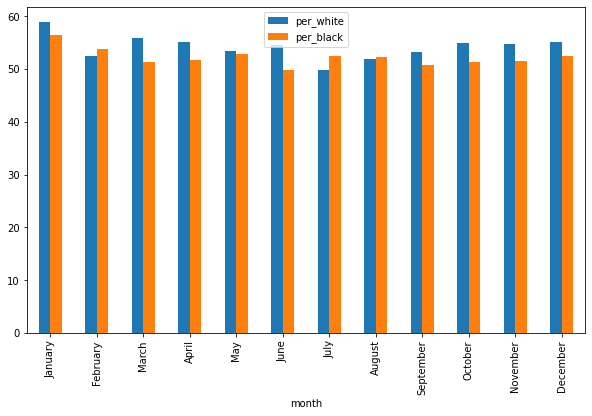

In [36]:
data.plot(x="month", y=['per_white','per_black'], kind="bar",figsize=(10,6))
plt.show()

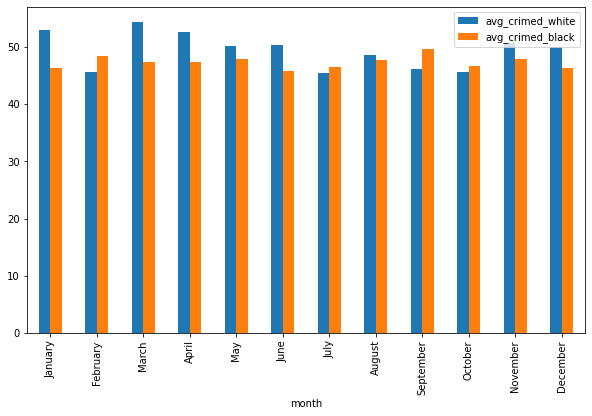

In [37]:
data.plot(x="month", y=['avg_crimed_white','avg_crimed_black'], kind="bar",figsize=(10,6))
plt.show()

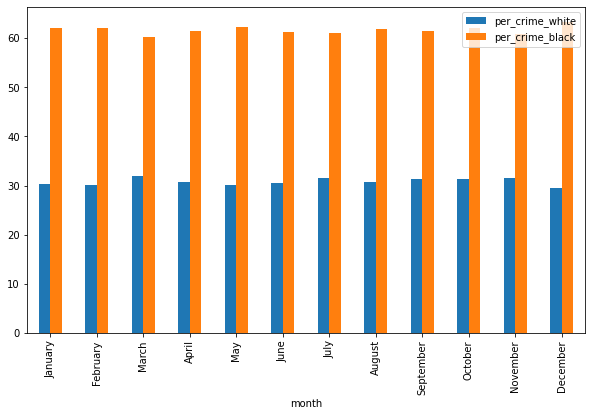

In [38]:
data.plot(x="month", y=['per_crime_white','per_crime_black'], kind="bar",figsize=(10,6))
plt.show()